Please upload 'Customers.csv'


Saving Customers.csv to Customers (1).csv
Please upload 'Products.csv'


Saving Products.csv to Products (1).csv
Please upload 'Transactions.csv'


Saving Transactions.csv to Transactions (1).csv

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Elec

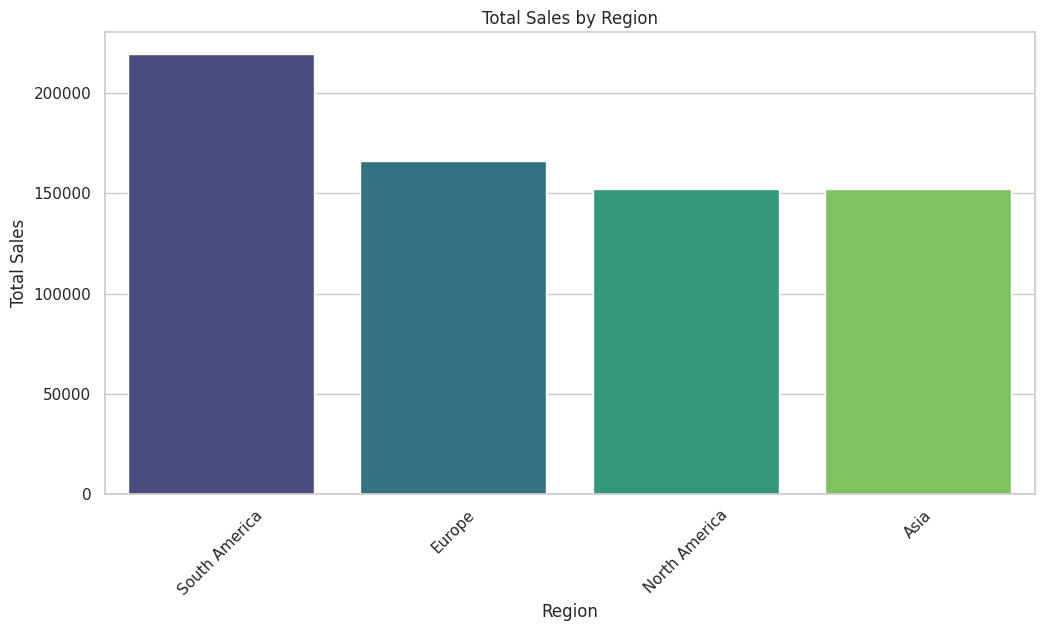

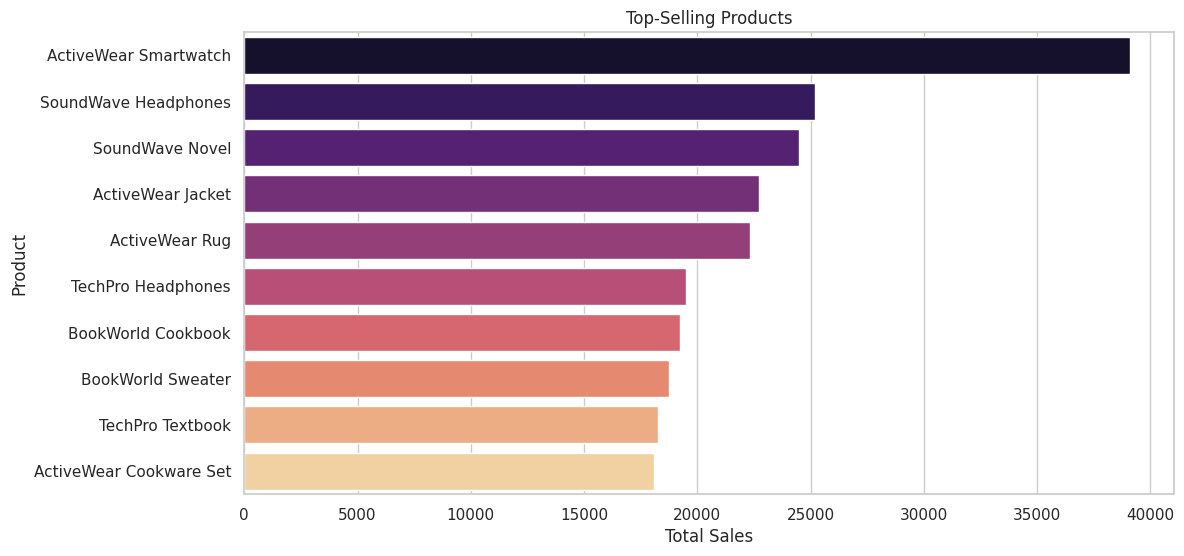

In [ ]:
# Task 1: Exploratory Data Analysis (EDA)

# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
from google.colab import files

print("upload 'Customers.csv'")
uploaded = files.upload()
customers = pd.read_csv(next(iter(uploaded.keys())))

print("upload 'Products.csv'")
uploaded = files.upload()
products = pd.read_csv(next(iter(uploaded.keys())))

print("upload 'Transactions.csv'")
uploaded = files.upload()
transactions = pd.read_csv(next(iter(uploaded.keys())))

print("\nCustomers Data:")
print(customers.head())
print(customers.info())

print("\nProducts Data:")
print(products.head())
print(products.info())

print("\nTransactions Data:")
print(transactions.head())
print(transactions.info())

merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')
merged_data = pd.merge(merged_data, products, on='ProductID', how='left')

# Data Cleaning and Transformation
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])
merged_data['YearMonth'] = merged_data['TransactionDate'].dt.to_period('M')

# Top 5 regions by total transactions
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nTop 5 Regions by Sales:")
print(region_sales.head())

# Top products by sales
product_sales = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
print("\nTop 5 Products by Sales:")
print(product_sales.head())

# Visualizations
# Total sales by region
sns.barplot(x=region_sales.index, y=region_sales.values, hue=region_sales.index, dodge=False, palette='viridis', legend=False)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Top-selling products
sns.barplot(y=product_sales.index[:10], x=product_sales.values[:10], hue=product_sales.index[:10], dodge=False, palette='magma', legend=False)
plt.title('Top-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()